# CSC529 Assignment 4
## Matt Triano

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import copy
import warnings
from IPython.display import display
%matplotlib inline

from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

from imblearn.over_sampling import SMOTE, ADASYN
from sklearn.svm import SVC
from sklearn.svm import LinearSVC

In [11]:
data_raw = pd.read_csv('spambase.csv')
spam_labels = data_raw['spam']
data_df = data_raw.drop('spam', axis=1)
display(data_df.head(5))
display(spam_labels.head(5))

wf_make  wf_address  wf_all  wf_3d  wf_our  wf_over  wf_remove  \
0     0.00        0.64    0.64    0.0    0.32     0.00       0.00   
1     0.21        0.28    0.50    0.0    0.14     0.28       0.21   
2     0.06        0.00    0.71    0.0    1.23     0.19       0.19   
3     0.00        0.00    0.00    0.0    0.63     0.00       0.31   
4     0.00        0.00    0.00    0.0    0.63     0.00       0.31   

   wf_internet  wf_order  wf_mail    ...      wf_conference  cf_;   cf_(  \
0         0.00      0.00     0.00    ...                0.0  0.00  0.000   
1         0.07      0.00     0.94    ...                0.0  0.00  0.132   
2         0.12      0.64     0.25    ...                0.0  0.01  0.143   
3         0.63      0.31     0.63    ...                0.0  0.00  0.137   
4         0.63      0.31     0.63    ...                0.0  0.00  0.135   

   cf_[   cf_!   cf_$   cf_#  crl_average  crl_longest  crl_total  
0   0.0  0.778  0.000  0.000        3.756           61        278  
1   0.0  0.372  0.180  0.048        5.114          101       1028  
2   0.0  0.276  0.184  0.010        9.821          485       2259  
3   0.0  0.137  0.000  0.000        3.537           40        191  
4   0.0  0.135  0.000  0.000        3.537           40        191  

[5 rows x 57 columns]

0    1
1    1
2    1
3    1
4    1
Name: spam, dtype: int64

In [23]:
data_df.describe()
# type(spam_labels)
data_raw.describe()

wf_make   wf_address       wf_all        wf_3d       wf_our  \
count  4601.000000  4601.000000  4601.000000  4601.000000  4601.000000   
mean      0.104553     0.213015     0.280656     0.065425     0.312223   
std       0.305358     1.290575     0.504143     1.395151     0.672513   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.000000     0.000000     0.420000     0.000000     0.380000   
max       4.540000    14.280000     5.100000    42.810000    10.000000   

           wf_over    wf_remove  wf_internet     wf_order      wf_mail  \
count  4601.000000  4601.000000  4601.000000  4601.000000  4601.000000   
mean      0.095901     0.114208     0.105295     0.090067     0.239413   
std       0.273824     0.391441     0.401071     0.278616     0.644755   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.000000     0.000000     0.000000     0.000000     0.160000   
max       5.880000     7.270000    11.110000     5.260000    18.180000   

          ...              cf_;         cf_(         cf_[         cf_!  \
count     ...       4601.000000  4601.000000  4601.000000  4601.000000   
mean      ...          0.038575     0.139030     0.016976     0.269071   
std       ...          0.243471     0.270355     0.109394     0.815672   
min       ...          0.000000     0.000000     0.000000     0.000000   
25%       ...          0.000000     0.000000     0.000000     0.000000   
50%       ...          0.000000     0.065000     0.000000     0.000000   
75%       ...          0.000000     0.188000     0.000000     0.315000   
max       ...          4.385000     9.752000     4.081000    32.478000   

              cf_$         cf_#  crl_average  crl_longest     crl_total  \
count  4601.000000  4601.000000  4601.000000  4601.000000   4601.000000   
mean      0.075811     0.044238     5.191515    52.172789    283.289285   
std       0.245882     0.429342    31.729449   194.891310    606.347851   
min       0.000000     0.000000     1.000000     1.000000      1.000000   
25%       0.000000     0.000000     1.588000     6.000000     35.000000   
50%       0.000000     0.000000     2.276000    15.000000     95.000000   
75%       0.052000     0.000000     3.706000    43.000000    266.000000   
max       6.003000    19.829000  1102.500000  9989.000000  15841.000000   

              spam  
count  4601.000000  
mean      0.394045  
std       0.488698  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       1.000000  
max       1.000000  

[8 rows x 58 columns]

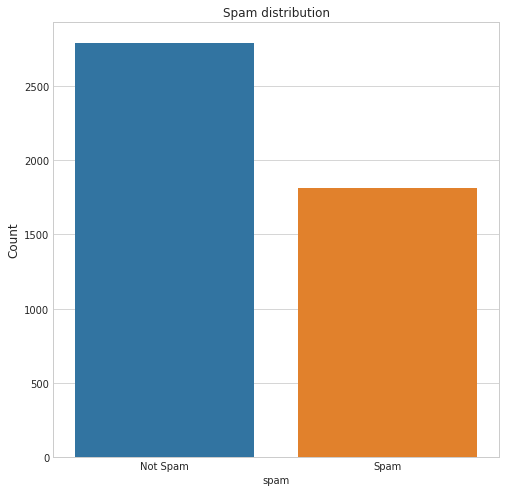

In [24]:
with plt.style.context('seaborn-whitegrid'):
    fig, ax0 = plt.subplots(nrows=1, ncols=1,figsize=(8,8))
    sns.countplot(x='spam', data=data_raw, ax=ax0)
    ax0.set_ylabel('Count', fontsize=12)
    ax0.set_xticklabels(['Not Spam', 'Spam'])    
#     ax0.set_xlabel('Spam')
    ax0.set_title('Spam distribution')

In [13]:
help(sns.countplot)

Help on function countplot in module seaborn.categorical:

countplot(x=None, y=None, hue=None, data=None, order=None, hue_order=None, orient=None, color=None, palette=None, saturation=0.75, dodge=True, ax=None, **kwargs)
    Show the counts of observations in each categorical bin using bars.
    
    A count plot can be thought of as a histogram across a categorical, instead
    of quantitative, variable. The basic API and options are identical to those
    for :func:`barplot`, so you can compare counts across nested variables.
    
    Input data can be passed in a variety of formats, including:
    
    - Vectors of data represented as lists, numpy arrays, or pandas Series
      objects passed directly to the ``x``, ``y``, and/or ``hue`` parameters.
    - A "long-form" DataFrame, in which case the ``x``, ``y``, and ``hue``
      variables will determine how the data are plotted.
    - A "wide-form" DataFrame, such that each numeric column will be plotted.
    - Anything accepted by `